<a href="https://colab.research.google.com/github/Azay961/Data-Science-with-GenAI-Internship---Sep-2024_Innomatics/blob/main/Electric_Vehicle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Documentation](https://docs.google.com/document/d/1PX4WruYepBC4xW1ZGEXBPOxOoDe_AsYaPjs1arZ0tF8/edit)

[LinkedIn](https://www.linkedin.com/in/chaudharyajay/)  
[Github](https://github.com/Azay961)

In [3]:
import pandas as pd

In [4]:
path = r"/content/EV_dataset.csv"
df = pd.read_csv(path)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040.0,2022.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,NaN,198968248.0,POINT (-81.80023 24.5545),NaN,1.208797e+10
1,1G1RD6E45D,Clark,Laughlin,NV,89029.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,NaN,5204412.0,POINT (-114.57245 35.16815),NaN,3.200301e+10
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,15.0,218972519.0,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,39.0,186750406.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201.0,2019.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,38.0,2006714.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         8857 non-null   object 
 1   County                                             8857 non-null   object 
 2   City                                               8857 non-null   object 
 3   State                                              8856 non-null   object 
 4   Postal Code                                        8856 non-null   float64
 5   Model Year                                         8856 non-null   float64
 6   Make                                               8856 non-null   object 
 7   Model                                              8856 non-null   object 
 8   Electric Vehicle Type                              8856 non-null   object 
 9   Clean Al

In [6]:
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,1
Postal Code,1
Model Year,1
Make,1
Model,1
Electric Vehicle Type,1
Clean Alternative Fuel Vehicle (CAFV) Eligibility,1


In [7]:
df.shape

(8857, 17)

In [8]:
df.columns = df.columns.str.strip()
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [9]:
(df["Base MSRP"] == 0).sum()*100/df.shape[0]


97.01930676301231

deleting the "Base MSRP" column as almost 97 % of it c0ntains 0

In [10]:
df.drop(columns=["Base MSRP"], inplace=True)
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df.head()

,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract
0,33040.0,2022.0,42.0,NaN,198968248.0,1.208797e+10
1,89029.0,2013.0,38.0,NaN,5204412.0,3.200301e+10
2,98901.0,2011.0,73.0,15.0,218972519.0,5.307700e+10
3,98237.0,2017.0,238.0,39.0,186750406.0,5.305795e+10
4,98201.0,2019.0,26.0,38.0,2006714.0,5.306104e+10


In [11]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df.head()

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,JTMEB3FV6N,Monroe,Key West,FL,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-81.80023 24.5545),NaN
1,1G1RD6E45D,Clark,Laughlin,NV,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-114.57245 35.16815),NaN
2,JN1AZ0CP8B,Yakima,Yakima,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-120.50721 46.60448),PACIFICORP
3,1G1FW6S08H,Skagit,Concrete,WA,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC
4,3FA6P0SU1K,Snohomish,Everett,WA,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC


# 1. Exploratory Data Analysis (Univariate and Bivariate)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def non_viz_num(data):
    print(data.agg(["min", "max", "mean", "median","std", "skew", "kurt"]))


def viz_num(data):
    fig, ax = plt.subplots(1, 3, figsize=(10,5), constrained_layout=True)

    ax[0].set_title("Histogram Plot")
    sns.histplot(data, ax=ax[0])

    ax[1].set_title("KDE plot")
    sns.kdeplot(data, ax=ax[1])

    ax[2].set_title("Box plot")
    sns.boxplot(data, ax=ax[2])

    plt.show()


def non_viz_cat(data):
    print(data.agg(["count", "nunique", "unique"]))
    print(data.value_counts())

def viz_cat(column_name):
    top_values = df[column_name].value_counts().head(10).index

    filtered_df = df[df[column_name].isin(top_values)]

    plt.figure(figsize=(10, 8))
    sns.countplot(x=column_name, data=filtered_df, order=top_values)

    plt.xticks(rotation=45, ha='right')

    plt.title('Top 10 Values Count Plot')

    plt.show()

################################################## Postal Code ##################################################
min        6443.000000
max       99403.000000
mean      98118.575655
median    98118.000000
std        2984.219237
skew        -23.907394
kurt        605.056442
Name: Postal Code, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


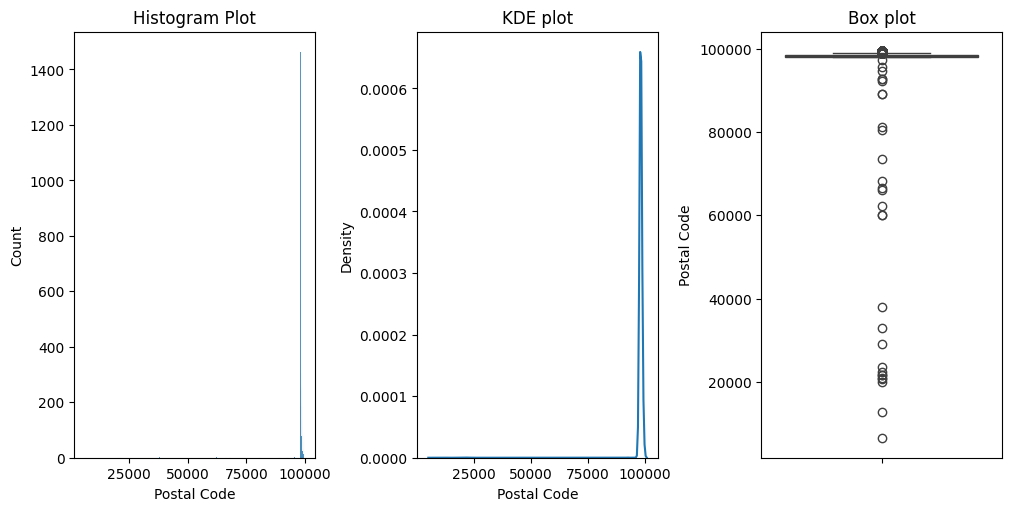

################################################## Model Year ##################################################
min       2010.000000
max       2023.000000
mean      2018.990176
median    2020.000000
std          2.856756
skew        -0.786992
kurt        -0.221245
Name: Model Year, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


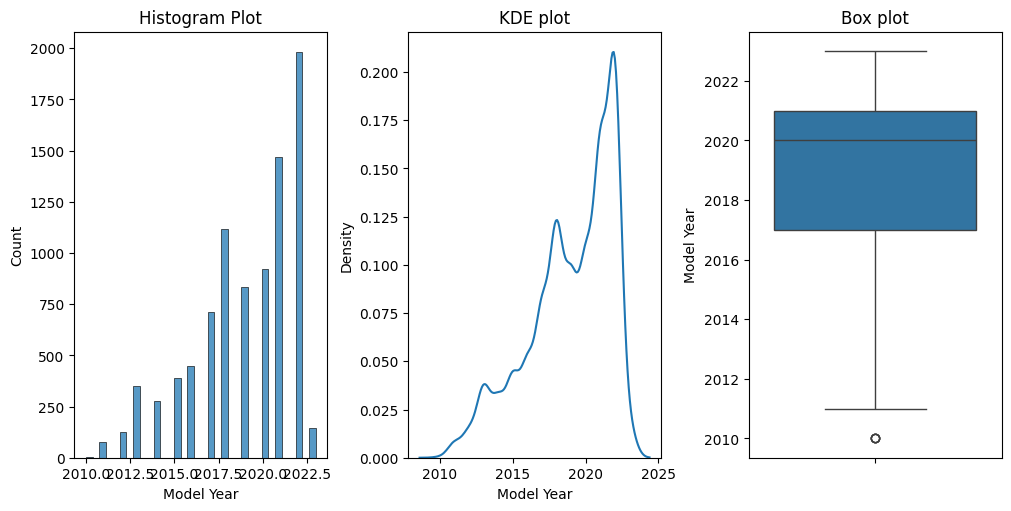

################################################## Electric Range ##################################################
min         0.000000
max       337.000000
mean       89.573058
median     35.000000
std       102.684966
skew        0.774037
kurt       -0.962934
Name: Electric Range, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


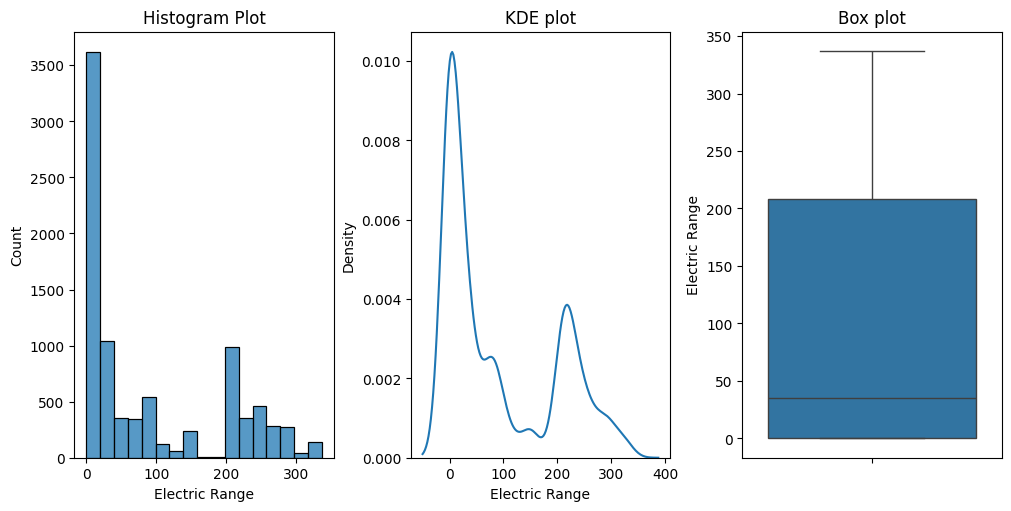

################################################## Legislative District ##################################################
min        1.000000
max       49.000000
mean      29.883879
median    34.000000
std       14.842820
skew      -0.536088
kurt      -0.994240
Name: Legislative District, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


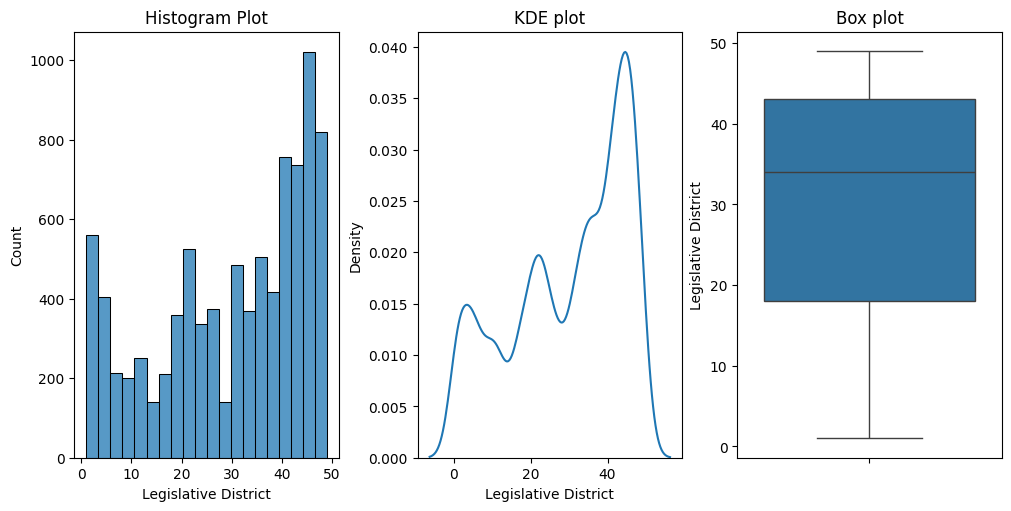

################################################## DOL Vehicle ID ##################################################
min       2.770200e+04
max       4.789346e+08
mean      1.990184e+08
median    1.907131e+08
std       9.376543e+07
skew      1.123914e+00
kurt      2.447656e+00
Name: DOL Vehicle ID, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


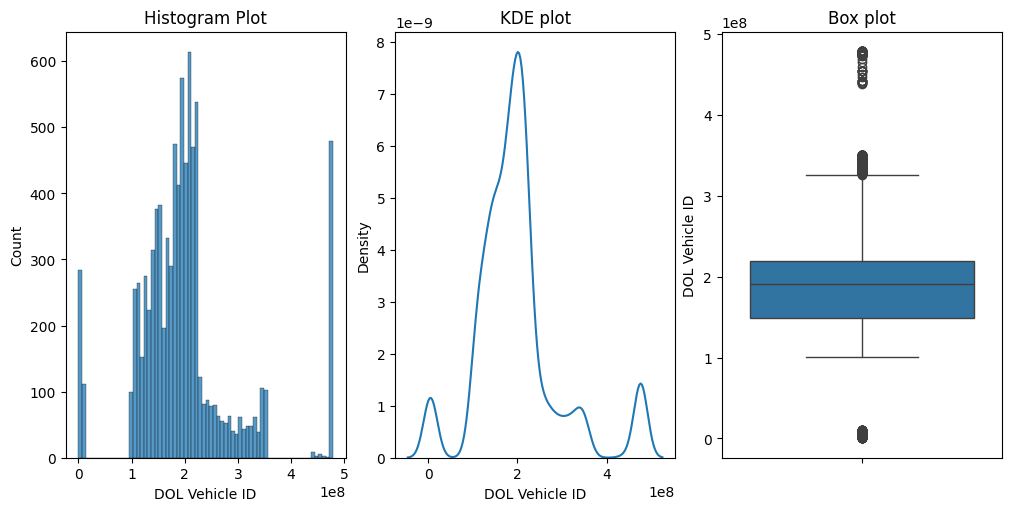

################################################## 2020 Census Tract ##################################################
min       6.013351e+09
max       5.307794e+10
mean      5.294213e+10
median    5.303303e+10
std       1.896853e+09
skew     -2.095751e+01
kurt      4.568382e+02
Name: 2020 Census Tract, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


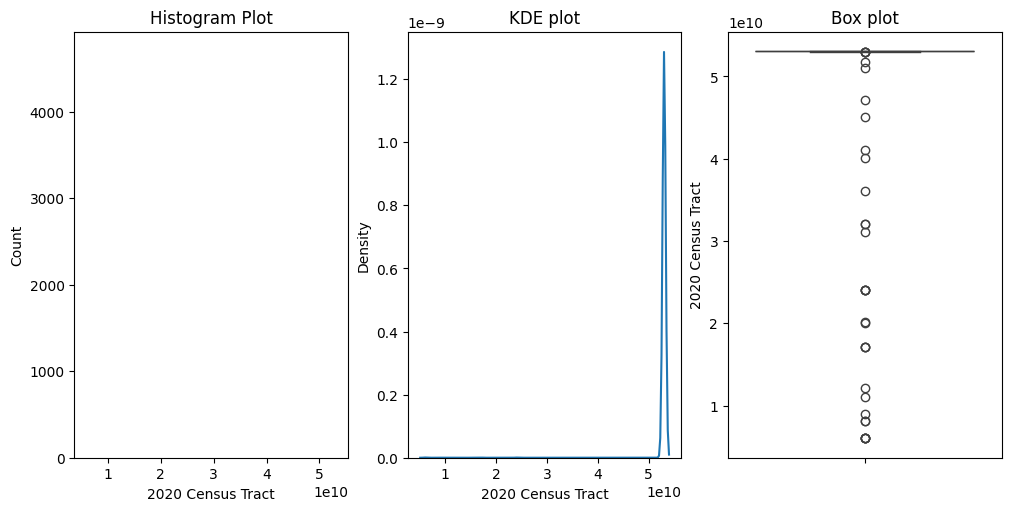

In [13]:
for col in numerical_df.columns:
  print("#"*50,col, "#"*50)
  non_viz_num(numerical_df[col])
  viz_num(numerical_df[col])

# removing outliers of numerical features

In [14]:
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_num_no_outliers = numerical_df[~((numerical_df < lower_bound) | (numerical_df > upper_bound)).any(axis=1)]
print(df_num_no_outliers.head())


    Postal Code  Model Year  Electric Range  Legislative District  \
3       98237.0      2017.0           238.0                  39.0   
6       98203.0      2013.0            75.0                  38.0   
7       98275.0      2013.0            75.0                  21.0   
9       98221.0      2016.0            93.0                  40.0   
10      98516.0      2020.0            20.0                  22.0   

    DOL Vehicle ID  2020 Census Tract  
3      186750406.0       5.305795e+10  
6      253546023.0       5.306104e+10  
7      176817364.0       5.306104e+10  
9      100489049.0       5.305794e+10  
10     103317238.0       5.306701e+10  


################################################## Postal Code ##################################################
min       98001.000000
max       98862.000000
mean      98202.864060
median    98115.000000
std         206.415090
skew          1.152331
kurt          0.248380
Name: Postal Code, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


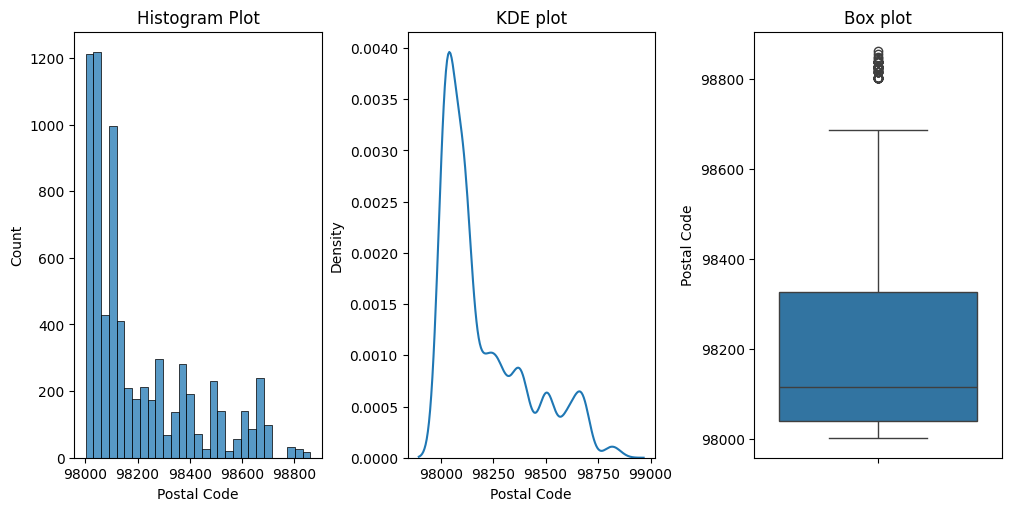

################################################## Model Year ##################################################
min       2011.000000
max       2023.000000
mean      2019.196048
median    2020.000000
std          2.934406
skew        -0.900147
kurt        -0.176167
Name: Model Year, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


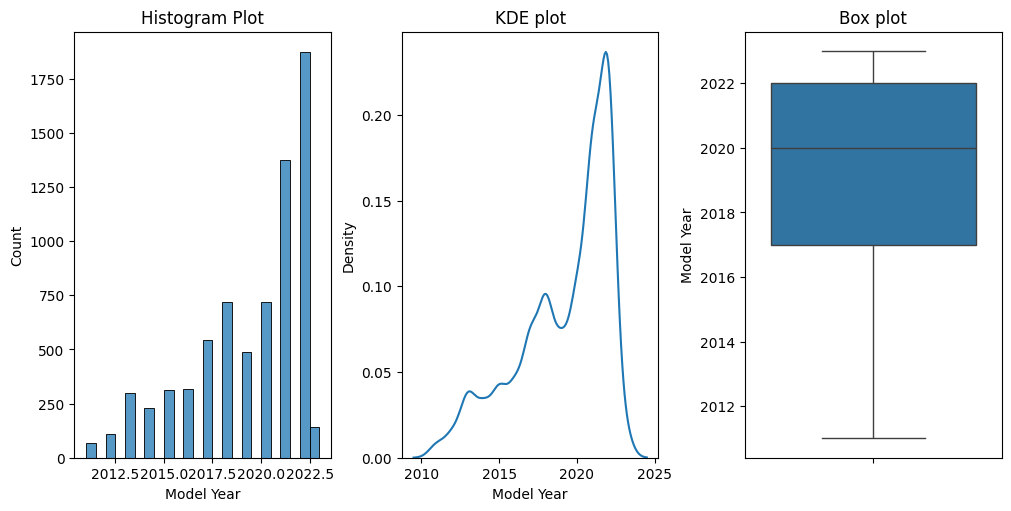

################################################## Electric Range ##################################################
min         0.000000
max       337.000000
mean       78.274802
median     25.000000
std        99.326565
skew        0.992585
kurt       -0.558108
Name: Electric Range, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


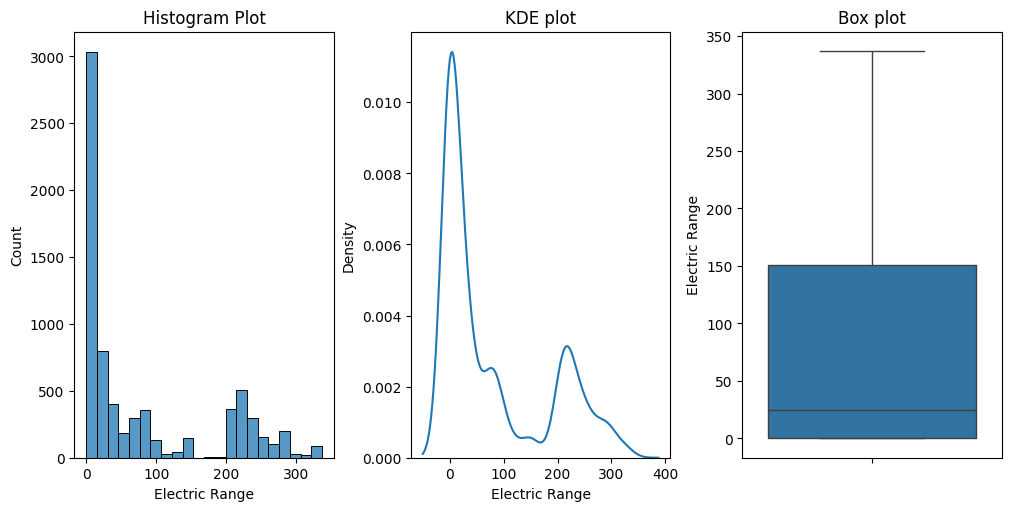

################################################## Legislative District ##################################################
min        1.000000
max       49.000000
mean      31.198831
median    35.000000
std       14.215328
skew      -0.687569
kurt      -0.662978
Name: Legislative District, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


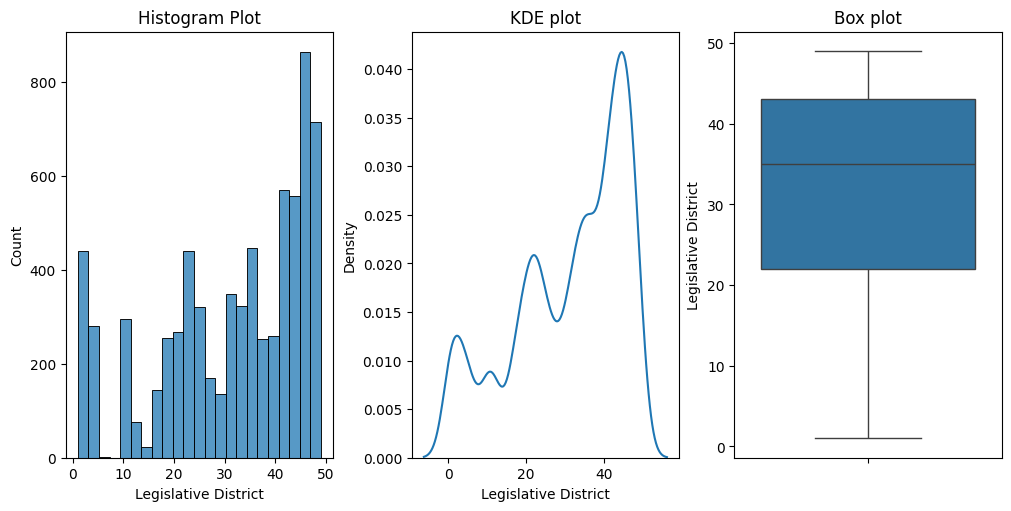

################################################## DOL Vehicle ID ##################################################
min       1.001346e+08
max       3.257116e+08
mean      1.851106e+08
median    1.870621e+08
std       4.681993e+07
skew      4.091504e-01
kurt      1.971849e-01
Name: DOL Vehicle ID, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


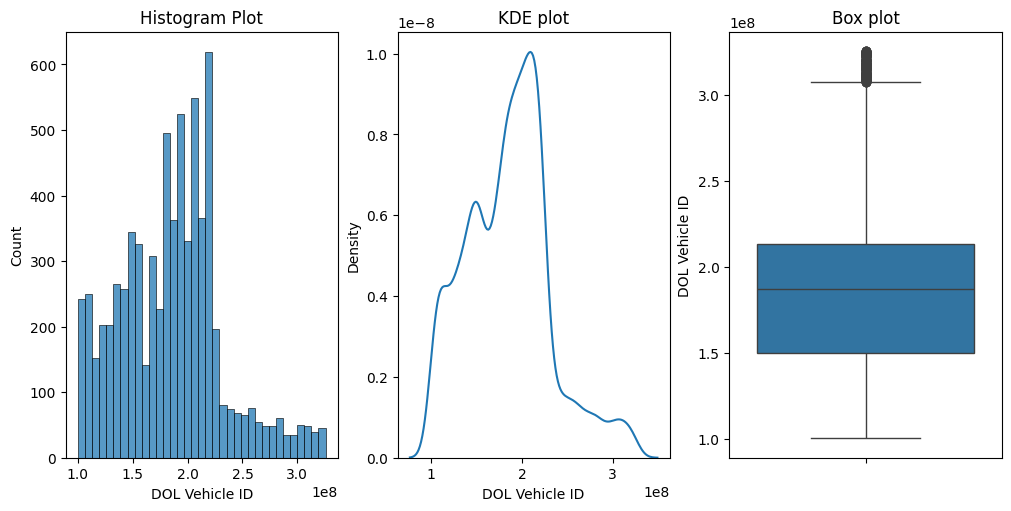

################################################## 2020 Census Tract ##################################################
min       5.300796e+10
max       5.307301e+10
mean      5.303923e+10
median    5.303303e+10
std       1.532861e+07
skew      3.972789e-01
kurt     -3.254904e-01
Name: 2020 Census Tract, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


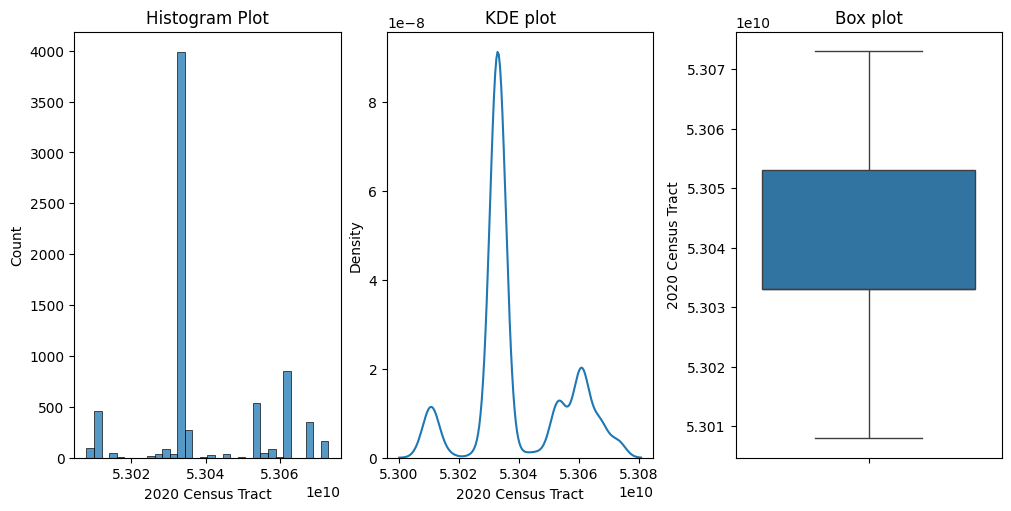

In [15]:
for col in df_num_no_outliers.columns:
  print("#"*50,col, "#"*50)
  non_viz_num(df_num_no_outliers[col])
  viz_num(df_num_no_outliers[col])

################################################## VIN (1-10) ##################################################
count                                                   8857
nunique                                                 3124
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
Name: VIN (1-10), dtype: object
VIN (1-10)
5YJYGDEEXM    43
5YJYGDEE9M    42
5YJYGDEE4M    41
5YJYGDEE5M    38
5YJYGDEE2M    38
              ..
JTDKARFP2K     1
2C4RC1L79M     1
1N4CZ1CV0P     1
KM8KRDAF3N     1
3FMTK3SU7N     1
Name: count, Length: 3124, dtype: int64


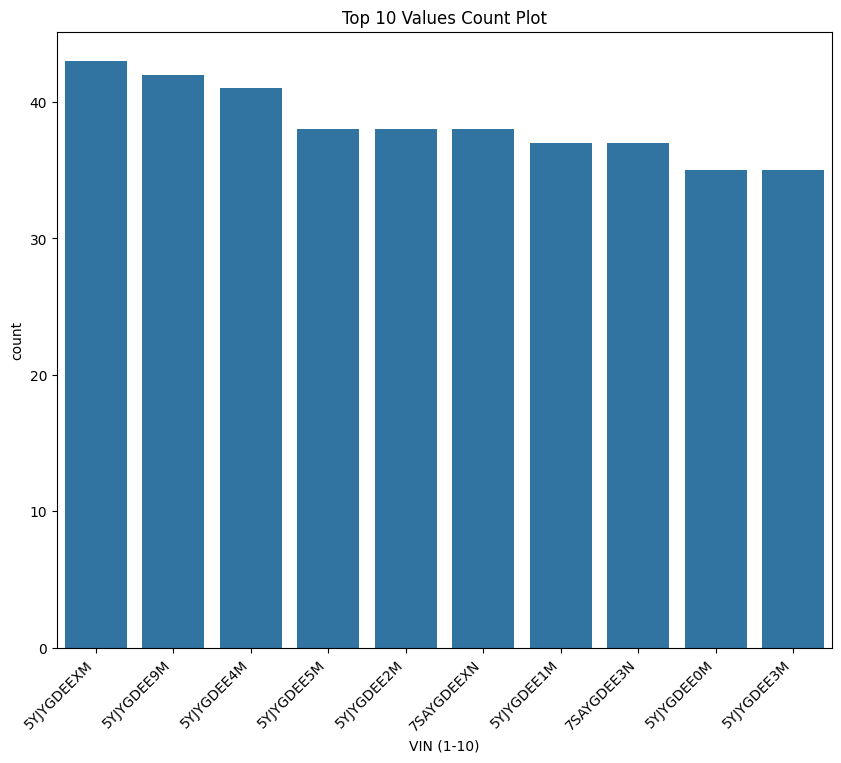

################################################## County ##################################################
count                                                   8857
nunique                                                   61
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
County
King            4642
Snohomish        987
Pierce           631
Clark            523
Thurston         415
                ... 
Jackson            1
Newport News       1
Saratoga           1
St. Clair          1
Frederick          1
Name: count, Length: 61, dtype: int64


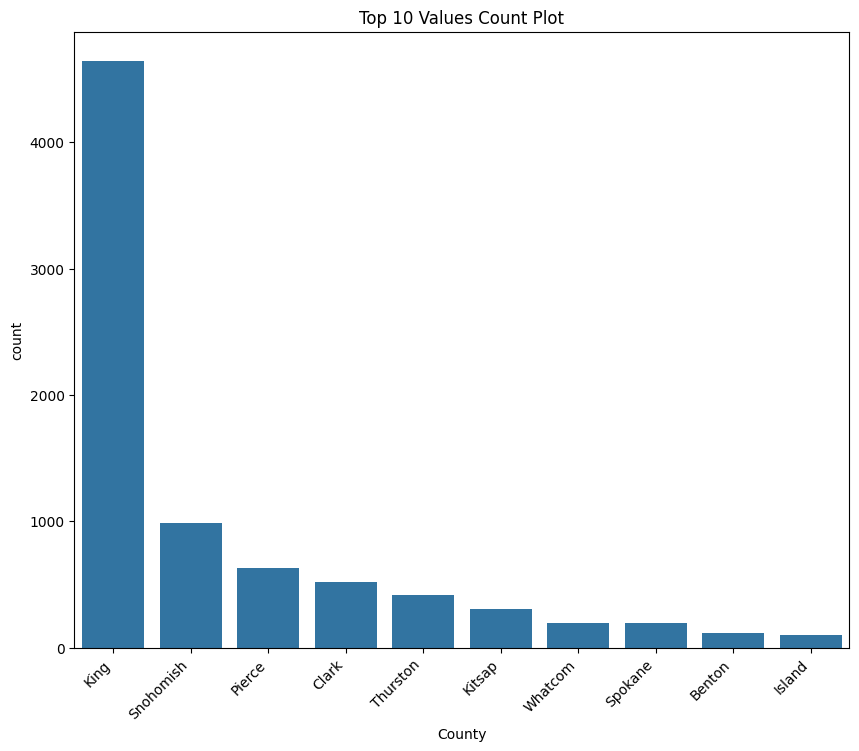

################################################## City ##################################################
count                                                   8857
nunique                                                  312
unique     [Key West, Laughlin, Yakima, Concrete, Everett...
Name: City, dtype: object
City
Seattle        1526
Bellevue        511
Kirkland        379
Redmond         359
Vancouver       334
               ... 
Hoquiam           1
St John           1
Rock Island       1
Artondale         1
Bo                1
Name: count, Length: 312, dtype: int64


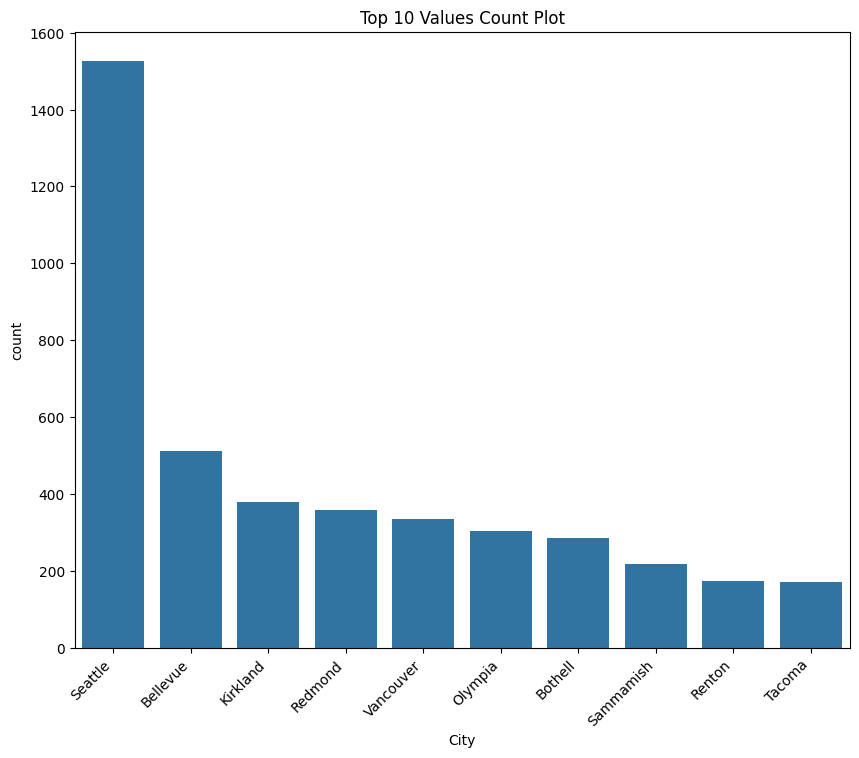

################################################## State ##################################################
count                                                   8856
nunique                                                   17
unique     [FL, NV, WA, IL, NY, VA, OK, KS, CA, NE, MD, C...
Name: State, dtype: object
State
WA    8827
CA       5
MD       4
IL       3
VA       2
KS       2
NV       2
CO       2
DC       1
CT       1
SC       1
TN       1
FL       1
NE       1
OK       1
NY       1
OR       1
Name: count, dtype: int64


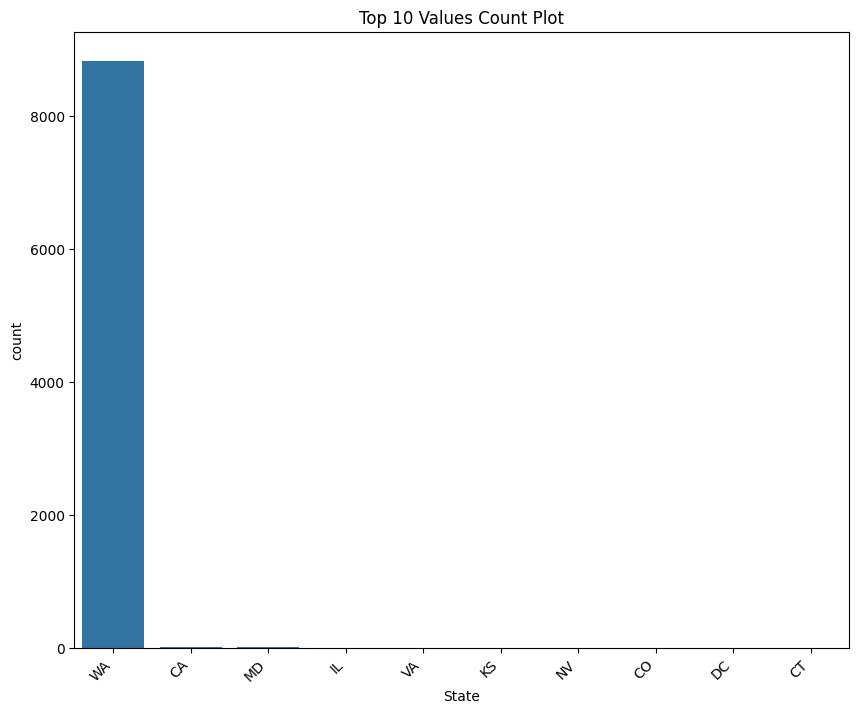

################################################## Make ##################################################
count                                                   8856
nunique                                                   31
unique     [TOYOTA, CHEVROLET, NISSAN, FORD, TESLA, KIA, ...
Name: Make, dtype: object
Make
TESLA            4076
NISSAN           1006
CHEVROLET         863
FORD              479
TOYOTA            352
BMW               340
KIA               327
AUDI              189
VOLKSWAGEN        187
VOLVO             186
CHRYSLER          126
HYUNDAI           116
RIVIAN             74
JEEP               72
MITSUBISHI         71
FIAT               69
HONDA              64
PORSCHE            56
MINI               46
MERCEDES-BENZ      40
POLESTAR           38
SMART              20
JAGUAR             17
LINCOLN            15
SUBARU              6
LUCID MOTORS        6
CADILLAC            5
FISKER              3
LAND ROVER          3
LEXUS               3
TH!NK              

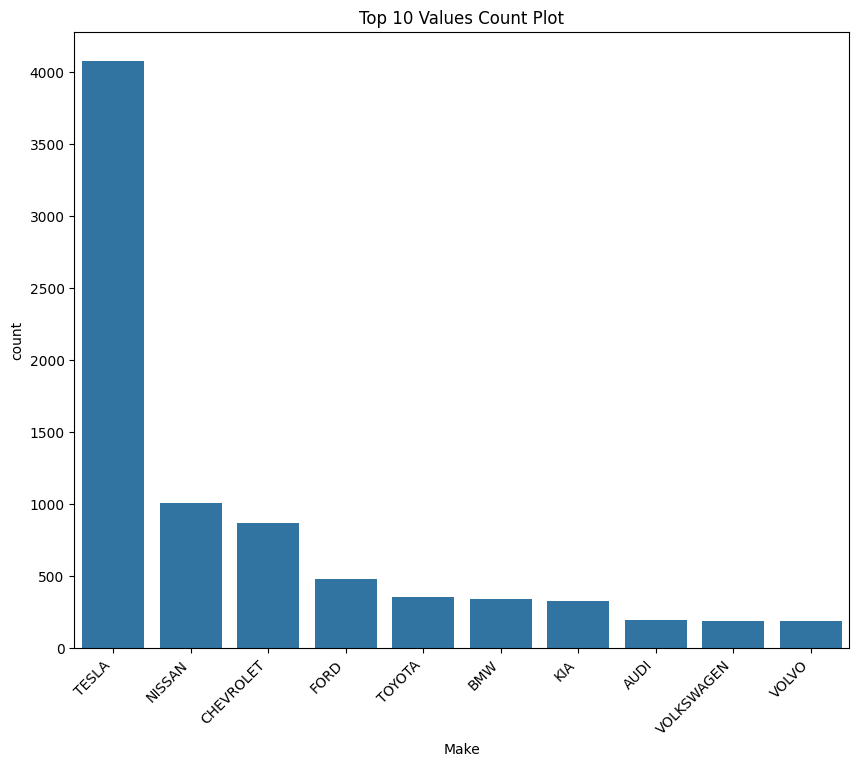

################################################## Model ##################################################
count                                                   8856
nunique                                                   97
unique     [RAV4 PRIME, VOLT, LEAF, BOLT EV, FUSION, MODE...
Name: Model, dtype: object
Model
MODEL 3    1785
MODEL Y    1365
LEAF       1006
MODEL S     564
BOLT EV     440
           ... 
740E          2
S-CLASS       2
I-MIEV        1
CITY          1
S90           1
Name: count, Length: 97, dtype: int64


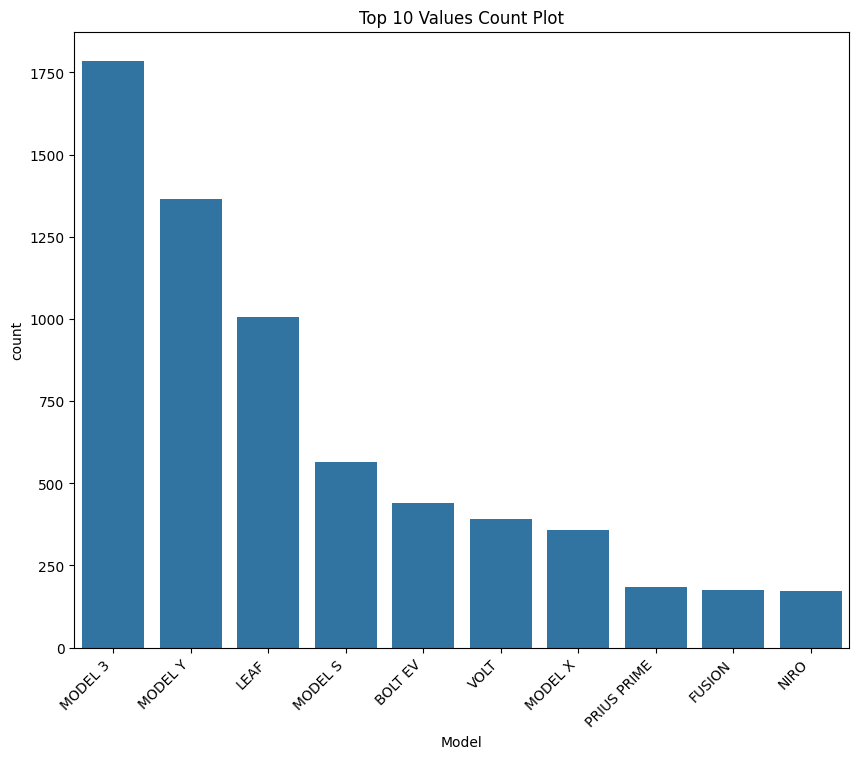

################################################## Electric Vehicle Type ##################################################
count                                                   8856
nunique                                                    2
unique     [Plug-in Hybrid Electric Vehicle (PHEV), Batte...
Name: Electric Vehicle Type, dtype: object
Electric Vehicle Type
Battery Electric Vehicle (BEV)            6779
Plug-in Hybrid Electric Vehicle (PHEV)    2077
Name: count, dtype: int64


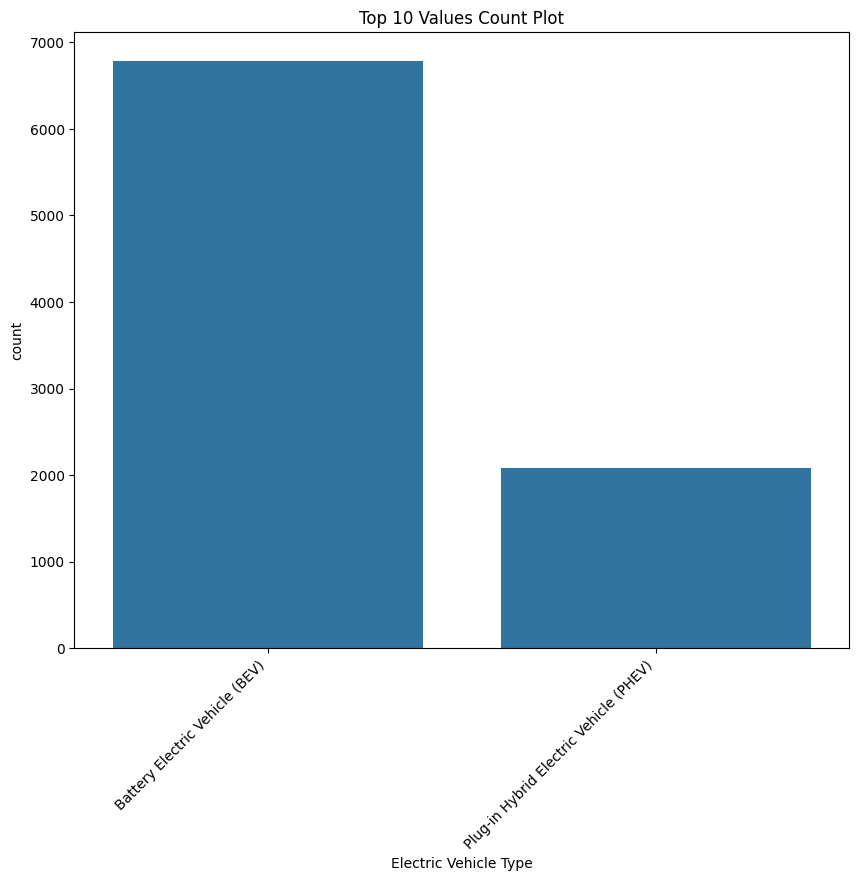

################################################## Clean Alternative Fuel Vehicle (CAFV) Eligibility ##################################################
count                                                   8856
nunique                                                    3
unique     [Clean Alternative Fuel Vehicle Eligible, Not ...
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: object
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         4656
Eligibility unknown as battery range has not been researched    3037
Not eligible due to low battery range                           1163
Name: count, dtype: int64


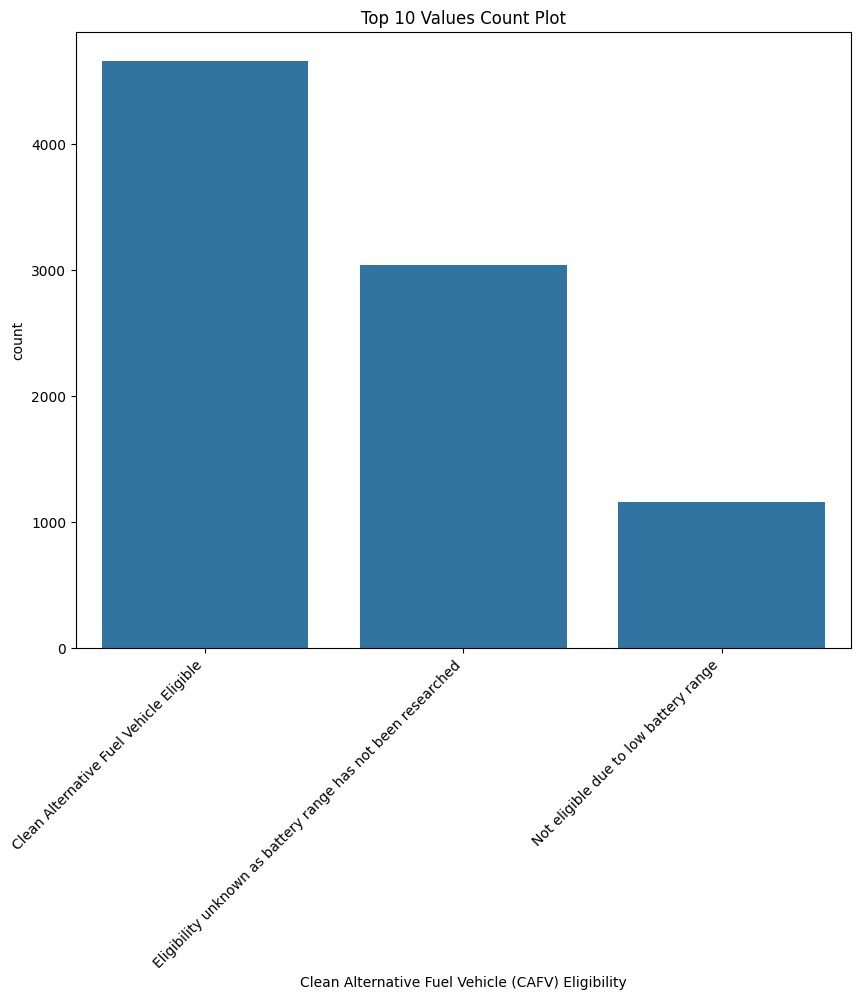

################################################## Vehicle Location ##################################################
count                                                   8855
nunique                                                  409
unique     [POINT (-81.80023 24.5545), POINT (-114.57245 ...
Name: Vehicle Location, dtype: object
Vehicle Location
POINT (-122.13158 47.67858)    254
POINT (-122.22901 47.72201)    203
POINT (-122.1872 47.61001)     195
POINT (-122.89166 47.03956)    193
POINT (-122.2066 47.67887)     179
                              ... 
POINT (-117.5821 47.09185)       1
POINT (-120.14545 47.37163)      1
POINT (-118.60061 48.88101)      1
POINT (-120.1231 48.3652)        1
POINT (-117.13359 47.00706)      1
Name: count, Length: 409, dtype: int64


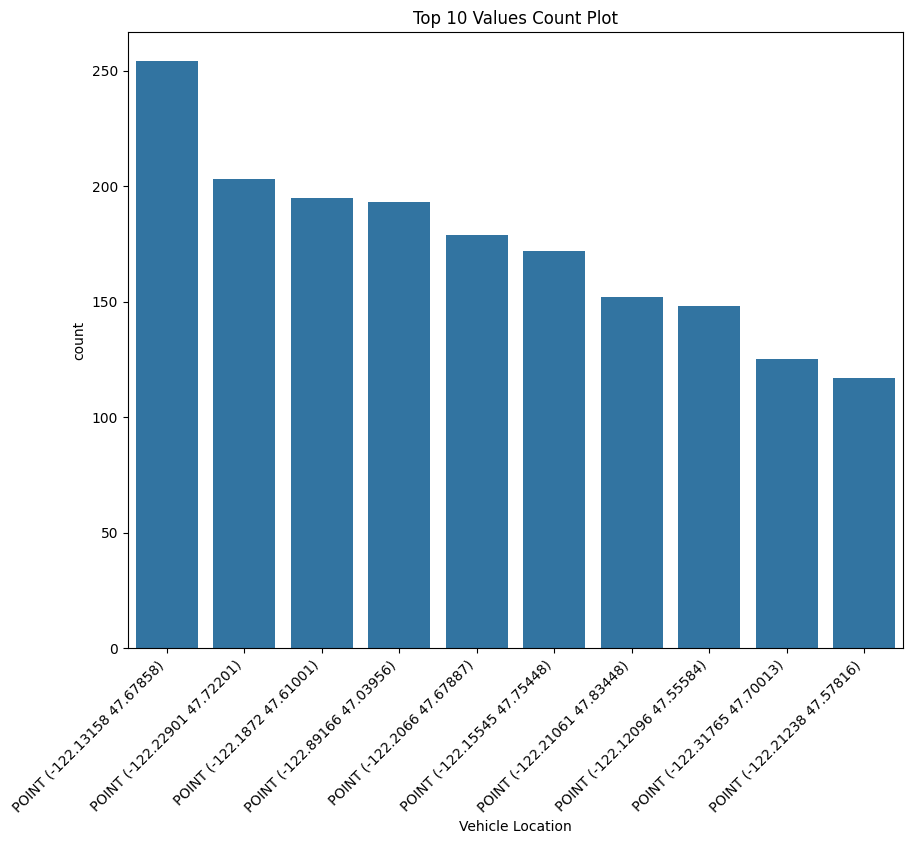

################################################## Electric Utility ##################################################
count                                                   8811
nunique                                                   56
unique     [nan, PACIFICORP, PUGET SOUND ENERGY INC, PUD ...
Name: Electric Utility, dtype: object
Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                       3197
PUGET SOUND ENERGY INC                                                                                              1852
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                        1653
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                                     510
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                      365
PUGET SOUND ENERGY INC||PUD NO 1 OF WH

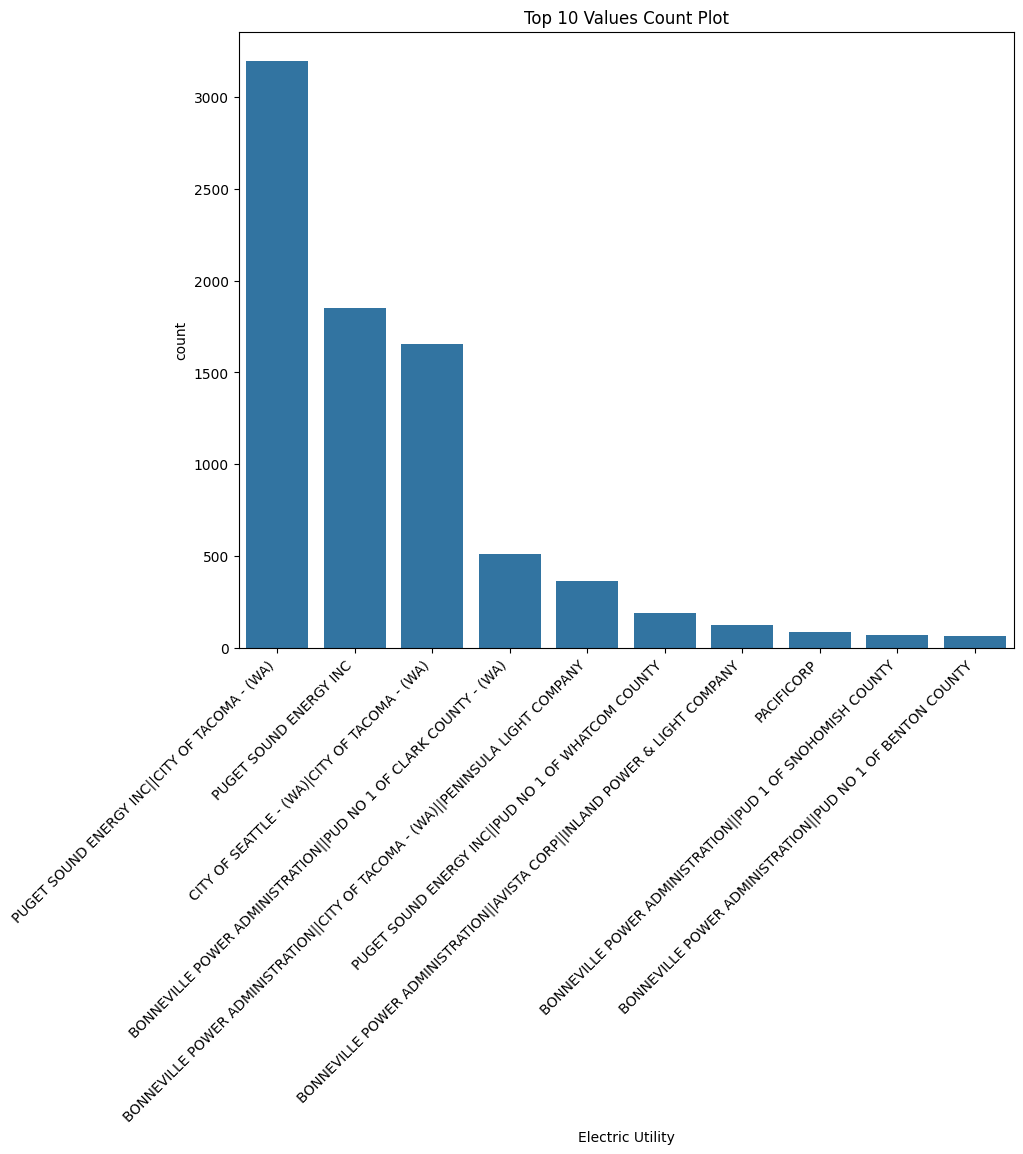

In [16]:
for col in categorical_df.columns:
  print("#"*50,col, "#"*50)
  non_viz_cat(categorical_df[col])
  viz_cat(col)

# Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [17]:
!pip install plotly

In [18]:
import plotly.express as px

In [19]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040.0,2022.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,NaN,198968248.0,POINT (-81.80023 24.5545),NaN,1.208797e+10
1,1G1RD6E45D,Clark,Laughlin,NV,89029.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,NaN,5204412.0,POINT (-114.57245 35.16815),NaN,3.200301e+10
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,15.0,218972519.0,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,39.0,186750406.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201.0,2019.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,38.0,2006714.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10


In [20]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'(-?\d+\.\d+) (-?\d+\.\d+)').astype(float)

grouped_df = df.groupby(['Latitude', 'Longitude', 'Postal Code', 'County', "State"]).size().reset_index(name='EV Count')

In [25]:
fig = px.scatter_mapbox(grouped_df,
                        lat='Latitude',
                        lon='Longitude',
                        color='EV Count',
                        size='EV Count',
                        mapbox_style='carto-positron',
                        zoom=3,
                        center={'lat': 37.0902, 'lon': -95.7129},
                        title='Scatter Map of Electric Vehicle Locations')

fig.show()

# Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year

In [22]:
!pip install bar-chart-race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.8 MB/s eta 0:00:00


In [27]:
import bar_chart_race as bcr
import warnings
warnings.filterwarnings("ignore")

df['Model Year'] = df['Model Year'].astype(str)

grouped_data = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot(index='Model Year', columns='Make', values='Count')

bcr.bar_chart_race(df=pivoted_data, filename='RacingBarPlot.mp4',
                   orientation='h', sort='desc', n_bars=10,
                   title='Year wise EV Make Count', filter_column_colors=True,  period_length=1000)

display(bcr.bar_chart_race(df=pivoted_data, orientation='h',
                           sort='desc', n_bars=10, title='Year wise EV Make Count',
                           filter_column_colors=True, period_length=1000))